In [266]:
import numpy as np
import pandas as pd

import os, sys
import matplotlib.pylab as plt
import matplotlib

colors = ["#f50c0c","#ff890a", "#fcba03", "#52e010", "#1fcfae", "#1028de", "#cb07ed", "#d60439"]

In [52]:
fps = 15
height = 3648
width = 3648
total_duration_frames = 12 * 60 * fps

In [229]:
group_data = pd.read_csv('/home/lab/Documents/LearningMastersData/ComplexLearning_MastersThesis_GroupPerformance.csv')
individual_data = pd.read_csv('/home/lab/Documents/LearningMastersData/CorrectedComplexLearning_MastersThesis_IndividualDoorPerformance.csv')
schedule = pd.read_csv("/home/lab/Documents/LearningMastersData/ComplexLearning_MastersThesis_Experimental_overview.csv")
individual_log = pd.read_csv("/home/lab/Documents/LearningMastersData/ComplexLearning_MastersThesis_IndividualRecordingLog.csv")

## Filter for faulty data
individual_data = individual_data[individual_data["Erroneous"] != 1]

In [132]:
group_data.head()

,filename,recID,date,time,treatment,group_id,door_color,frame#,IN/OUT(1/-1),info,note
0,rec_0000_group_task_groupid_003_treatment_dddd...,0,20220803,142456,dddd,3,NaN,0.0,0.0,NaN,with_door
1,rec_0001_group_task_groupid_001_treatment_cccc...,1,20220803,152609,cccc,1,NaN,0.0,0.0,NaN,with_door
2,rec_0002_group_task_groupid_002_treatment_ccdd...,2,20220803,162700,ccdd,2,NaN,0.0,0.0,NaN,with_door
3,rec_0003_group_task_groupid_005_treatment_cccc...,3,20220803,170921,cccc,5,NaN,0.0,0.0,NaN,with_door
4,rec_0004_group_task_groupid_008_treatment_ccdd...,4,20220805,111130,ccdd,8,NaN,0.0,0.0,NaN,with_door


In [133]:
individual_data.head()

,filename,recID,date,time,treatment,id,tank#no,frame#,IN/OUT(1/-1),info,note,Erroneous
0,rec0024_doorchoice_20220803_110948.24248657,24,2022/08/03,110948,without_food,43.0,24.0,3855.0,1.0,NaN,NaN,NaN
1,rec0024_doorchoice_20220803_110948.24248657,24,2022/08/03,110948,without_food,43.0,24.0,6567.0,-1.0,NaN,NaN,NaN
2,rec0024_doorchoice_20220803_110948.24248657,24,2022/08/03,110948,without_food,43.0,24.0,8569.0,1.0,NaN,NaN,NaN
3,rec0025_doorchoice_20220803_110948.24248658,25,2022/08/03,110948,without_food,32.0,16.0,788.0,1.0,NaN,NaN,NaN
4,rec0025_doorchoice_20220803_110948.24248658,25,2022/08/03,110948,without_food,32.0,16.0,1612.0,-1.0,NaN,NaN,NaN


In [50]:
individual_subset_index = individual_data["filename"] == "rec0024_doorchoice_20220803_110948.24248657"
individual_subset = individual_data[individual_subset_index]

In [28]:
individual_subset.shape

(3, 11)

In [51]:
individual_subset.head()

,filename,recID,date,time,treatment,id,tank#no,frame#,IN/OUT(1/-1),info,note
0,rec0024_doorchoice_20220803_110948.24248657,24,2022/08/03,110948,without_food,43.0,24.0,3855.0,1.0,NaN,NaN
1,rec0024_doorchoice_20220803_110948.24248657,24,2022/08/03,110948,without_food,43.0,24.0,6567.0,-1.0,NaN,NaN
2,rec0024_doorchoice_20220803_110948.24248657,24,2022/08/03,110948,without_food,43.0,24.0,8569.0,1.0,NaN,NaN


In [74]:
dummy_time_series = np.zeros(total_duration_frames)

In [75]:
print(dummy_time_series)

[0. 0. 0. ... 0. 0. 0.]


In [72]:
dummy_time_series[6567]

-1.0

In [76]:
for counter,event in enumerate(individual_subset["frame#"]):
    dummy_time_series[int(event)] = individual_subset["IN/OUT(1/-1)"][counter]
dummy_time_series[6567]

-1.0

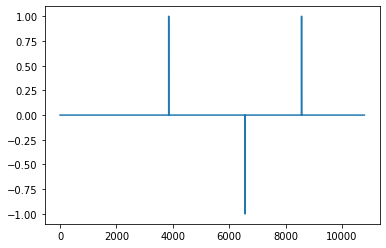

In [77]:
plt.plot(dummy_time_series)

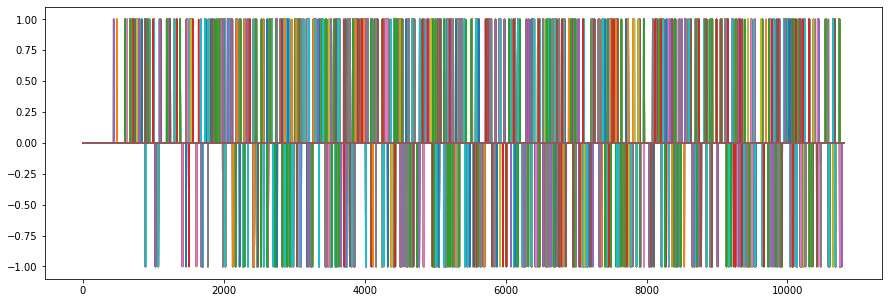

In [96]:
fig,ax = plt.subplots(figsize=(15,5))

for file_name in individual_data["filename"]:
    individual_subset_index = individual_data["filename"] == file_name
    individual_subset = individual_data[individual_subset_index]
    dummy_time_series = np.zeros(total_duration_frames)
    counter = 0
    for event in individual_subset["frame#"]:
        if np.isnan(individual_subset["IN/OUT(1/-1)"].to_numpy()[counter]) == True:
            continue
        dummy_time_series[int(event)] = individual_subset["IN/OUT(1/-1)"].to_numpy()[counter]
        counter = counter + 1
    ax.plot(dummy_time_series)
plt.show()

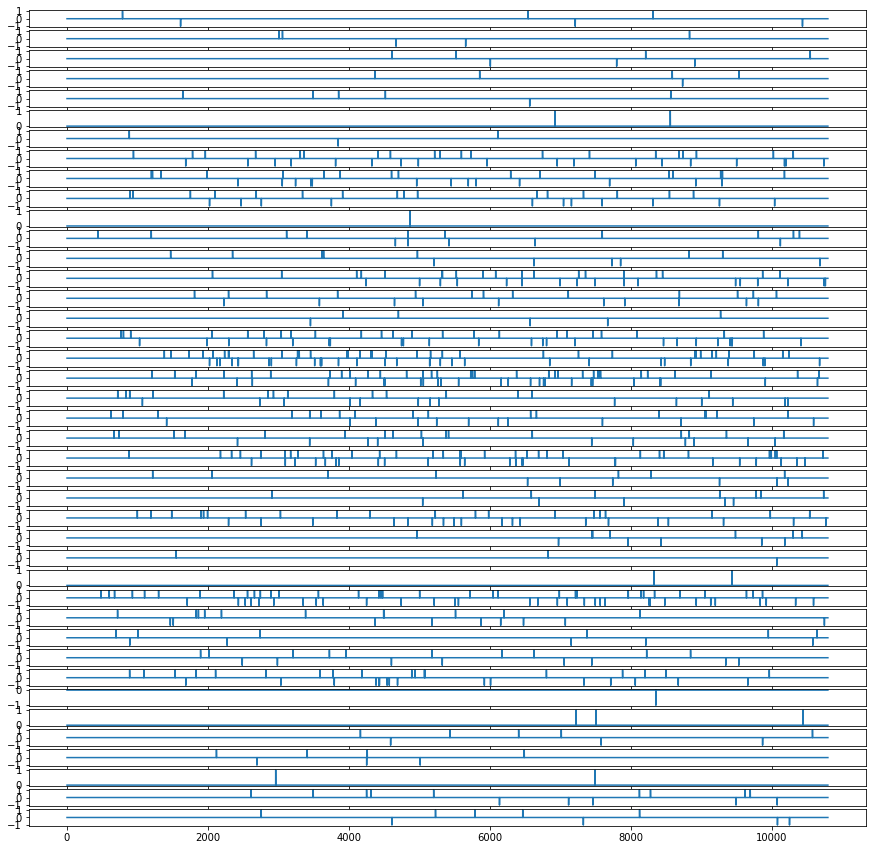

In [136]:
fig,ax = plt.subplots(len(np.unique(individual_data[np.isnan(individual_data["id"])==False]["id"])),1,figsize=(15,15))

for i, individual in enumerate(np.unique(individual_data["id"])):
    if np.isnan(individual):
        continue
    individual_subset_index = individual_data["id"] == individual
    individual_subset = individual_data[individual_subset_index]
    #print(len(np.unique(individual_subset["recID"])))
    dummy_time_series = np.zeros(total_duration_frames)
    counter = 0
    for event in individual_subset["frame#"]:
        if np.isnan(individual_subset["IN/OUT(1/-1)"].to_numpy()[counter]) == True:
            continue
        dummy_time_series[int(event)] = individual_subset["IN/OUT(1/-1)"].to_numpy()[counter]
        counter = counter + 1
    ax[i].plot(dummy_time_series)
plt.show()

In [137]:
individual_data[individual_data["id"]==43]

,filename,recID,date,time,treatment,id,tank#no,frame#,IN/OUT(1/-1),info,note,Erroneous
0,rec0024_doorchoice_20220803_110948.24248657,24,2022/08/03,110948,without_food,43.0,24.0,3855.0,1.0,NaN,NaN,NaN
1,rec0024_doorchoice_20220803_110948.24248657,24,2022/08/03,110948,without_food,43.0,24.0,6567.0,-1.0,NaN,NaN,NaN
2,rec0024_doorchoice_20220803_110948.24248657,24,2022/08/03,110948,without_food,43.0,24.0,8569.0,1.0,NaN,NaN,NaN
15,rec0027_doorchoice_20220803_121613.24248657,27,2022/08/03,121613,with_food,43.0,24.0,3492.0,1.0,NaN,NaN,NaN
23,rec0030_doorchoice_20220803_144831.24248657,30,2022/08/03,144831,with_food,43.0,24.0,1643.0,1.0,NaN,NaN,NaN
30,rec0033_doorchoice_20220803_163909.24248657,33,2022/08/03,163909,with_food,43.0,24.0,4518.0,1.0,NaN,NaN,NaN


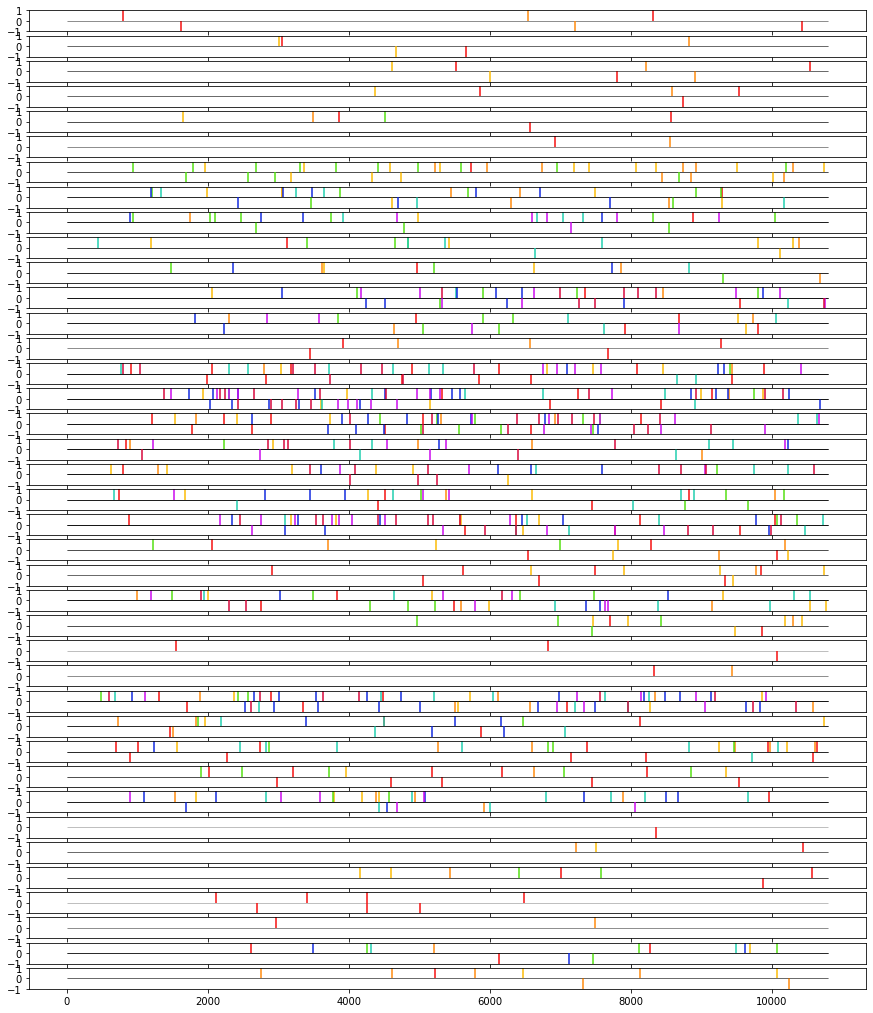

In [295]:
fig,ax = plt.subplots(len(np.unique(individual_data[np.isnan(individual_data["id"])==False]["id"])),1,figsize=(15,18))

# Loop over individual in entire data set
for i, individual in enumerate(np.unique(individual_data["id"])):
    # Exclude recordings without any events
    if np.isnan(individual):
        continue
        
    # Create subset of data only for certain individual
    individual_subset_index = individual_data["id"] == individual
    individual_subset = individual_data[individual_subset_index]

    camera = schedule[schedule["id"]==individual]["camera#"].to_numpy()[0]
    run = schedule[schedule["id"]==individual]["run#"].to_numpy()[0]
    partner_ids = schedule[(schedule["run#"]==run)&(schedule["camera#"]==camera)]["id"].to_numpy()
    block_overview = individual_log[np.isin(individual_log["id"].to_numpy(),partner_ids)]
    reference_instances = block_overview[block_overview["id"]==individual]["instance#"].to_numpy()
    reference_file_names = block_overview[block_overview["id"]==individual]["filename"].to_numpy()
    reference_file_names = np.array([f for f in reference_file_names if f.find("colorchoice") < 0])
    
    # Find instances for single individual and determine order based on filenames in individual subset
    instances = [reference_instances[np.isin(f,reference_file_names)] for f in individual_subset["filename"].to_numpy()]
    instances = np.concatenate(instances)[0]
    
    # Exclude erroneously named individuals
    if len(instances) < 1:
        print("Erroneous Identities: ", individual)
    
    learning_counter = [ [] for _ in range(len(instances)) ]
    
    # Loop over all recordings of selected single individual
    for r,rec in enumerate(np.unique(individual_subset["recID"])):
        dummy_time_series = np.zeros(total_duration_frames)
        recording_subset = individual_subset[individual_subset["recID"]==rec]
        
        # Exclude recordings without food being present
        #if instances[r] == 0 or instances[r] == 3:
        #    continue
        
        # Input event values for each event into the empty time series
        for counter, event in enumerate(recording_subset["frame#"]):
            if np.isnan(individual_subset["IN/OUT(1/-1)"].to_numpy()[counter]) == True:
                continue
            dummy_time_series[int(event)] = individual_subset["IN/OUT(1/-1)"].to_numpy()[counter]
            
        event_count = len(dummy_time_series[dummy_time_series!=0])
        learning_counter[instances[r]].append(event_count)
        
        # Plot data
        ax[i].hlines(0,0,total_duration_frames,lw=0.5,color="black",alpha=0.5)
        ax[i].vlines(np.where(dummy_time_series!=0),0,dummy_time_series[dummy_time_series!=0],
                    color=colors[instances[r]])
        ax[i].set_ylim(-1,1)
plt.show()

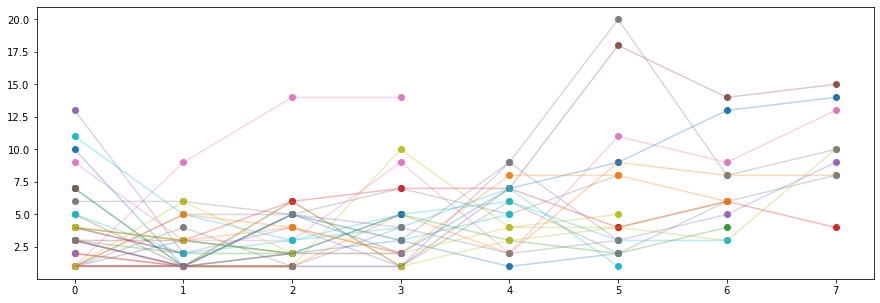

In [297]:
#fig,ax = plt.subplots(len(np.unique(individual_data[np.isnan(individual_data["id"])==False]["id"])),1,figsize=(15,18))
fig,ax = plt.subplots(figsize=(15,5))

# Loop over individual in entire data set
for i, individual in enumerate(np.unique(individual_data["id"])):
    # Exclude recordings without any events
    if np.isnan(individual):
        continue
        
    # Create subset of data only for certain individual
    individual_subset_index = individual_data["id"] == individual
    individual_subset = individual_data[individual_subset_index]

    camera = schedule[schedule["id"]==individual]["camera#"].to_numpy()[0]
    run = schedule[schedule["id"]==individual]["run#"].to_numpy()[0]
    partner_ids = schedule[(schedule["run#"]==run)&(schedule["camera#"]==camera)]["id"].to_numpy()
    block_overview = individual_log[np.isin(individual_log["id"].to_numpy(),partner_ids)]
    reference_instances = block_overview[block_overview["id"]==individual]["instance#"].to_numpy()
    reference_file_names = block_overview[block_overview["id"]==individual]["filename"].to_numpy()
    reference_file_names = np.array([f for f in reference_file_names if f.find("colorchoice") < 0])
    
    # Find instances for single individual and determine order based on filenames in individual subset
    instances = [reference_instances[np.isin(f,reference_file_names)] for f in individual_subset["filename"].to_numpy()]
    instances = np.concatenate(instances)[0]
    
    # Exclude erroneously named individuals
    if len(instances) < 1:
        print("Erroneous Identities: ", individual)
    
    learning_counter = [ [] for _ in range(len(instances)) ]
    
    # Loop over all recordings of selected single individual
    for r,rec in enumerate(np.unique(individual_subset["recID"])):
        dummy_time_series = np.zeros(total_duration_frames)
        recording_subset = individual_subset[individual_subset["recID"]==rec]
        
        # Exclude recordings without food being present
        #if instances[r] == 0 or instances[r] == 3:
        #    continue
        
        # Input event values for each event into the empty time series
        for counter, event in enumerate(recording_subset["frame#"]):
            if np.isnan(individual_subset["IN/OUT(1/-1)"].to_numpy()[counter]) == True:
                continue
            dummy_time_series[int(event)] = individual_subset["IN/OUT(1/-1)"].to_numpy()[counter]
            
        event_count = len(dummy_time_series[dummy_time_series!=0])
        learning_counter[instances[r]].append(event_count)
        
    # Plot data
    ax.plot(np.concatenate(learning_counter),alpha=0.3)
    ax.scatter(np.arange(len(np.concatenate(learning_counter))),np.concatenate(learning_counter))
plt.show()